In [23]:
import aoc
import matplotlib.pyplot as plt
import numpy as np

# Day 6

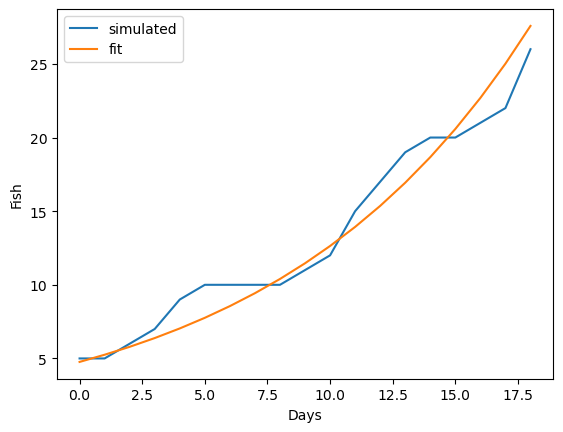

In [46]:
sim = """Initial state: 3,4,3,1,2
After  1 day:  2,3,2,0,1
After  2 days: 1,2,1,6,0,8
After  3 days: 0,1,0,5,6,7,8
After  4 days: 6,0,6,4,5,6,7,8,8
After  5 days: 5,6,5,3,4,5,6,7,7,8
After  6 days: 4,5,4,2,3,4,5,6,6,7
After  7 days: 3,4,3,1,2,3,4,5,5,6
After  8 days: 2,3,2,0,1,2,3,4,4,5
After  9 days: 1,2,1,6,0,1,2,3,3,4,8
After 10 days: 0,1,0,5,6,0,1,2,2,3,7,8
After 11 days: 6,0,6,4,5,6,0,1,1,2,6,7,8,8,8
After 12 days: 5,6,5,3,4,5,6,0,0,1,5,6,7,7,7,8,8
After 13 days: 4,5,4,2,3,4,5,6,6,0,4,5,6,6,6,7,7,8,8
After 14 days: 3,4,3,1,2,3,4,5,5,6,3,4,5,5,5,6,6,7,7,8
After 15 days: 2,3,2,0,1,2,3,4,4,5,2,3,4,4,4,5,5,6,6,7
After 16 days: 1,2,1,6,0,1,2,3,3,4,1,2,3,3,3,4,4,5,5,6,8
After 17 days: 0,1,0,5,6,0,1,2,2,3,0,1,2,2,2,3,3,4,4,5,7,8
After 18 days: 6,0,6,4,5,6,0,1,1,2,6,0,1,1,1,2,2,3,3,4,6,7,8,8,8,8""".splitlines()

fish = [len(x.split(':')[1].split(',')) for x in sim]

fish

fig, ax = plt.subplots()
days = np.array(range(len(fish)))
ax.plot(days, fish, label='simulated')
ax.plot(days, np.exp((days+16)/10.25), label='fit')
ax.set_ylabel('Fish')
ax.set_xlabel('Days')
ax.legend()

In [49]:
np.exp((np.array([80, 256, 257, 290])+16)/10.25)

array([1.16825746e+04, 3.34728424e+11, 3.69030946e+11, 9.23164652e+12])

In [2]:
raw_data = aoc.get_data(2021,6)

In [3]:
data = list(map(int, raw_data.split(',')))

In [4]:
population = [data.count(x) for x in range(9)]

In [50]:
def iterate_day(population):
    
    breeders = children = population[0]

    new_population = population[1:] + [0]
    
    new_population[6] += breeders

    new_population[-1] += children

    return new_population


def simulate(population, days):

    pop = population.copy()
    
    for day in range(days):
        pop = iterate_day(pop)

    return pop

In [51]:
sum(simulate(population, 80))

345793

In [52]:
sum(simulate(population, 256))

1572643095893

In [12]:
%%timeit
sum(simulate(population, 80))

34.2 μs ± 3.39 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
sum(simulate(population, 256))

114 μs ± 4.59 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [54]:
sum(simulate(population, 2**10))

179015728399927960558946868532524007926125

In [56]:
sum(simulate(population, 2**16))

1075483142931979900244329178997028223018650611837230745828860947375937027372697599173501566157535481178298414374130997754353790059909363693473470611166306446999170363485736116126606658271428293576060487634999020533448279126997629235793360169795825927144765724080320422307686881139688848972943032239092057123592511305955298467490937271875074215959793695904291508140522633904575908220124632433561031113797705961613755642446483718535291305687793006960170655258656661785169153130359271821281714139546711404765662696248803179078006753134001757548454454006656585759663325265733876810876362538070773454094442222466096351391288873879733578443592944448025802247883803460317292759362175615758250705068084860456619559060883490903959814927564669646277983468161936716647497206222397193254894088017638871250751108258539067438374787046194904725275392759187261767724304164797675999121509171829675931983301791381805600270406387596213646314899776042198630825705851870499850283519168446919158861225594437738341821725240

In [10]:
%%timeit
sum(simulate(population, 2**16))

56 ms ± 9.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
2**16

65536

In [57]:
sum(simulate(population, 2**17))

ValueError: Exceeds the limit (4300 digits) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit